# Brain Tumort MRI : Visualisation of the data and classification

Note : This notebook is an experimental work to understand and get along with classical methods and pipelines in data analysis and classification 

In [50]:
%load_ext autoreload
%autoreload 2
import sys
import os
import random
import numpy as np
import torch 
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

from torchvision import datasets

import torch.nn as nn
import torch.utils.data as data
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split


src_path = os.path.abspath(os.path.join('..', 'src'))

if src_path not in sys.path:
    sys.path.append(src_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
from utils import compute_mean_std, save_model, save_plots, SIZE, SEED, BATCH_SIZE, N_CLASSES
from utils import show_images

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'show_images' from 'utils' (/home/joh/Documents/school/projets/mri-classifier/src/utils.py)

In [42]:
# pr l'instnatn je fixe rien mais apres on le fera pr reproductibilité
CLASS_TYPES = ['pituitary', 'notumor', 'meningioma', 'glioma']
N_TYPES = len(CLASS_TYPES)
dataset_path = r"../data"
train_dir = dataset_path + r'/Training/'
test_dir = dataset_path + r'/Testing/'


In [43]:
train_data = datasets.ImageFolder(root=train_dir)
test_data = datasets.ImageFolder(root=test_dir)

In [44]:
train_paths = [p for p, _ in train_data.samples] 
test_paths = [p for p, _ in test_data.samples]

train_labels = [train_data.classes[label] for _, label in train_data.samples]
test_labels = [test_data.classes[label] for _, label in test_data.samples]  

df_train = pd.DataFrame({'path': train_paths, 'label': train_labels})
df_test = pd.DataFrame({'path': test_paths, 'label': test_labels})


df_train['split'] = 'train'
df_test['split'] = 'test'

df_all = pd.concat([df_train, df_test], ignore_index=True)

In [45]:
print(df_all)

                                          path      label  split
0     ../data/Training/glioma/Tr-glTr_0000.jpg     glioma  train
1     ../data/Training/glioma/Tr-glTr_0001.jpg     glioma  train
2     ../data/Training/glioma/Tr-glTr_0002.jpg     glioma  train
3     ../data/Training/glioma/Tr-glTr_0003.jpg     glioma  train
4     ../data/Training/glioma/Tr-glTr_0004.jpg     glioma  train
...                                        ...        ...    ...
7018  ../data/Testing/pituitary/Te-pi_0295.jpg  pituitary   test
7019  ../data/Testing/pituitary/Te-pi_0296.jpg  pituitary   test
7020  ../data/Testing/pituitary/Te-pi_0297.jpg  pituitary   test
7021  ../data/Testing/pituitary/Te-pi_0298.jpg  pituitary   test
7022  ../data/Testing/pituitary/Te-pi_0299.jpg  pituitary   test

[7023 rows x 3 columns]


In [46]:
train_counts = df_all[df_all['split'] == 'train']['label'].value_counts()
test_counts = df_all[df_all['split'] == 'test']['label'].value_counts()
print("Training")
print(train_counts)
print("\nTesting")
print(test_counts)

Training
label
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64

Testing
label
notumor       405
meningioma    306
glioma        300
pituitary     300
Name: count, dtype: int64


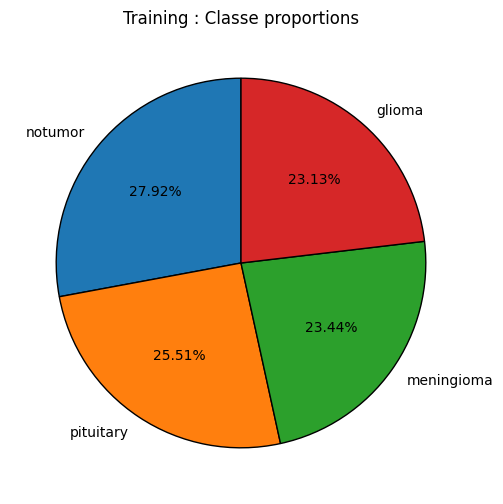

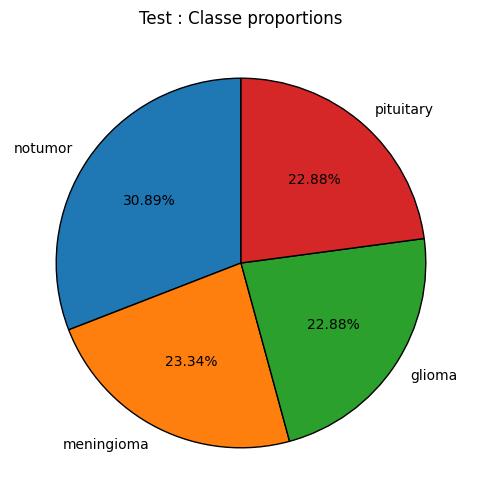

In [30]:
train_counts.plot(
    kind='pie',
    autopct='%.2f%%',
    figsize=(6,6),
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Training : Classe proportions")
plt.ylabel('')
plt.show()
test_counts.plot(
    kind='pie',
    autopct='%.2f%%',
    figsize=(6,6),
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Test : Classe proportions")
plt.ylabel('')
plt.show()



split
train    5712
test     1311
Name: count, dtype: int64


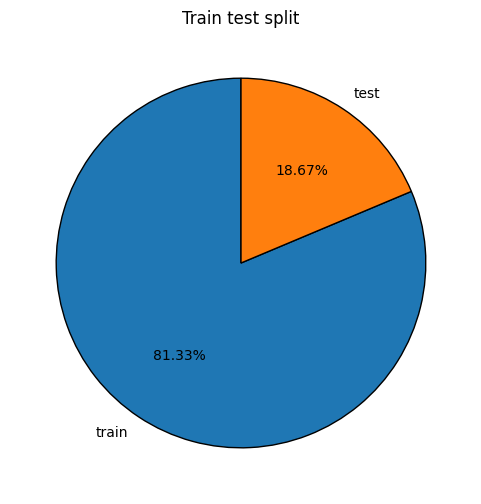

In [31]:
test = df_all['split'].value_counts()
print(test)
test.plot(
    kind='pie',
    autopct='%.2f%%',
    figsize=(6,6),
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Train test split")
plt.ylabel('')
plt.show()

In [53]:
def show_images(dataframe, n_sample, size, mode="RGB", random_state=None):
    plt.figure(figsize=(22,22))
    shuffle_df = dataframe.sample(n_sample, random_state=random_state)
    for i in range(n_sample):
        path = shuffle_df['path'].iloc[i]
        label = shuffle_df['label'].iloc[i]
        index = shuffle_df.index[i]
        plt.subplot(n_sample//4 + 1, 4, i+1)
        img = Image.open(path).convert(mode).resize(size)
        plt.imshow(img)
        plt.title(str(index) + ": " + label)
    plt.show()
        


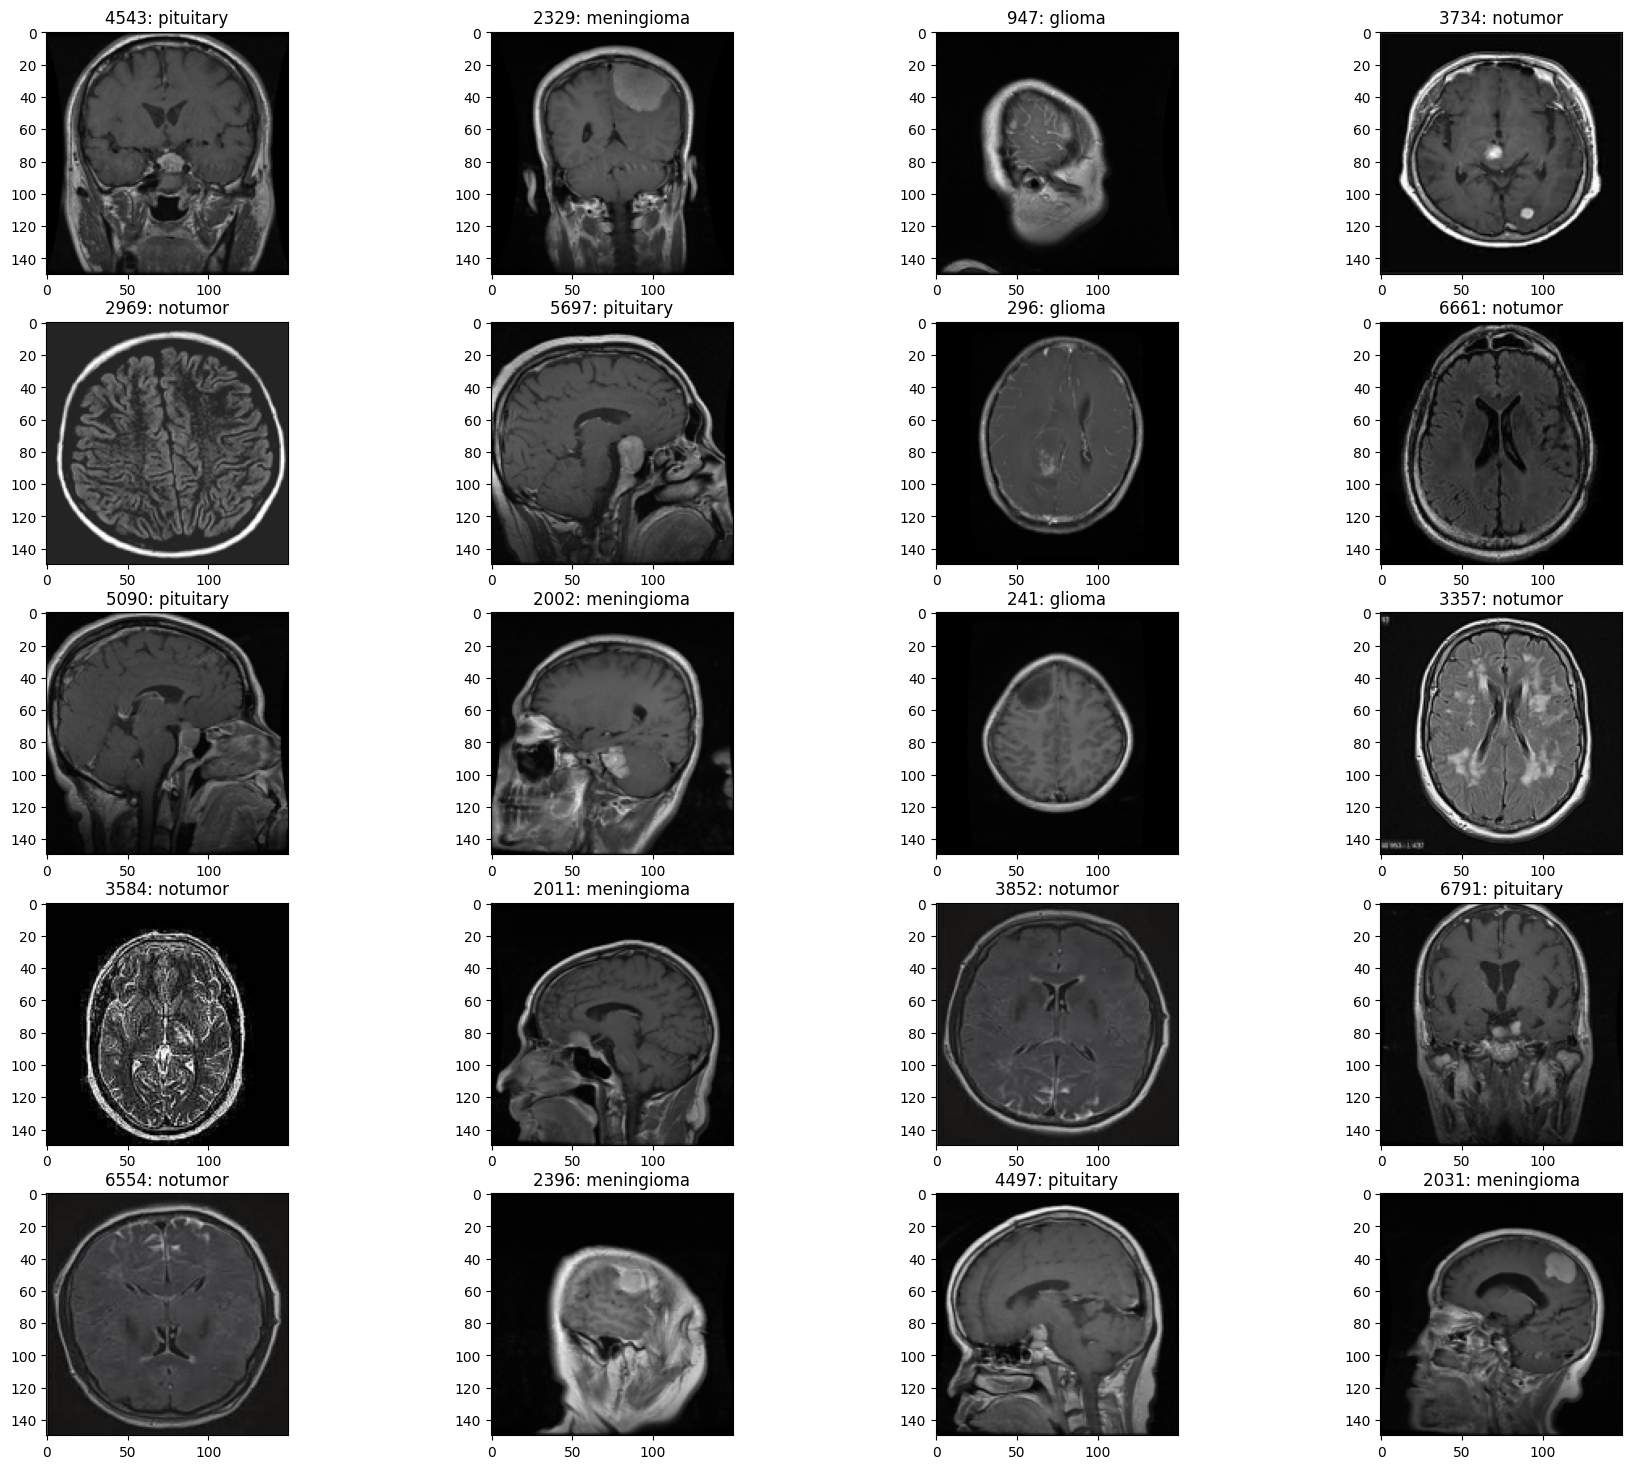

In [54]:
show_images(df_all, n_sample=20, size=SIZE)

# Preprocessing and Training

Check the source code and the main.py.

All instructions are in README.md